In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('./dataset/customer_shopping_data.csv')

# Display first few records
print(df.head())

# Check structure
print(df.info())

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2

In [3]:
print(df.columns)
print(df.describe(include='all'))


Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')
       invoice_no customer_id  gender           age  category      quantity  \
count       99457       99457   99457  99457.000000     99457  99457.000000   
unique      99457       99457       2           NaN         8           NaN   
top       I138884     C241288  Female           NaN  Clothing           NaN   
freq            1           1   59482           NaN     34487           NaN   
mean          NaN         NaN     NaN     43.427089       NaN      3.003429   
std           NaN         NaN     NaN     14.990054       NaN      1.413025   
min           NaN         NaN     NaN     18.000000       NaN      1.000000   
25%           NaN         NaN     NaN     30.000000       NaN      2.000000   
50%           NaN         NaN     NaN     43.000000       NaN      3.000000   
75%           NaN         NaN     NaN     5

In [4]:
# Create a 'sales_amount' column if missing
if 'sales_amount' not in df.columns:
    df['sales_amount'] = df['quantity'] * df['price']


In [7]:
# Group by shopping mall and aggregate total sales
mall_sales = df.groupby('shopping_mall')['sales_amount'].sum().reset_index()

# Sort by sales
mall_sales = mall_sales.sort_values(by='sales_amount', ascending=False)

print(mall_sales)


       shopping_mall  sales_amount
5   Mall of Istanbul   50872481.68
4             Kanyon   50554231.10
6          Metrocity   37302787.33
7       Metropol AVM   25379913.19
3       Istinye Park   24618827.68
9       Zorlu Center   12901053.82
0        Cevahir AVM   12645138.20
8     Viaport Outlet   12521339.72
1  Emaar Square Mall   12406100.29
2     Forum Istanbul   12303921.24


C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_19120\2972658629.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='shopping_mall', y='sales_amount', data=mall_sales, palette='viridis')


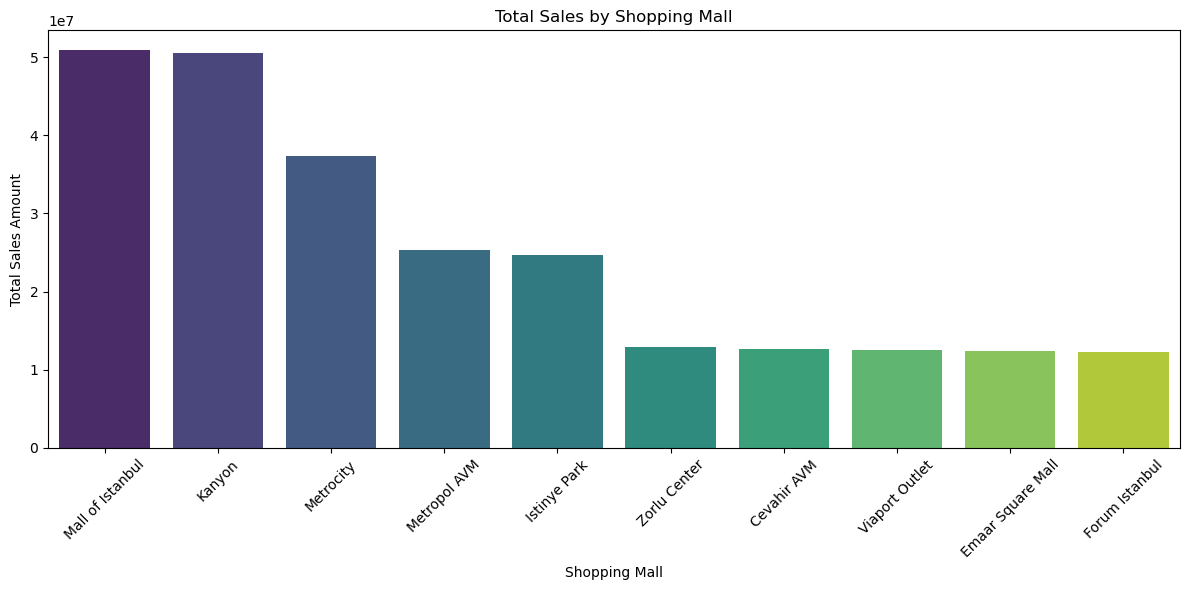

In [9]:
# Visualize Sales Distribution by Shopping Mall
plt.figure(figsize=(12,6))
sns.barplot(x='shopping_mall', y='sales_amount', data=mall_sales, palette='viridis')
plt.title("Total Sales by Shopping Mall")
plt.xlabel("Shopping Mall")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


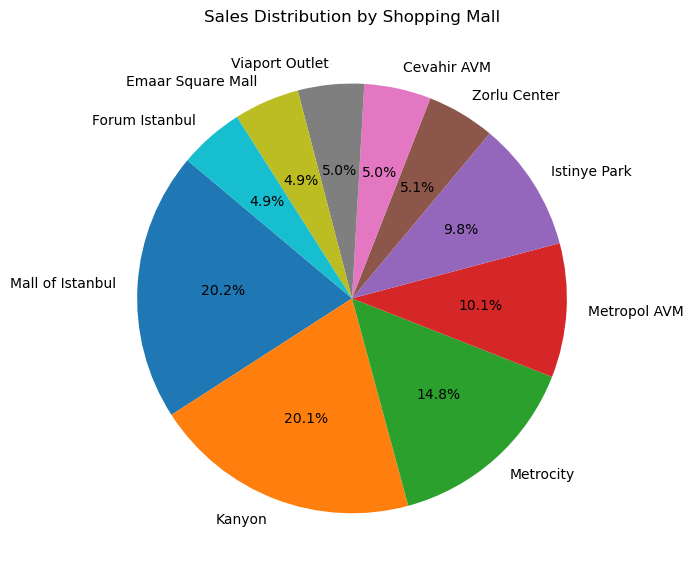

In [12]:
# region_sales is not defined in the notebook; use mall_sales (available) instead
plt.figure(figsize=(7,7))
plt.pie(mall_sales['sales_amount'], labels=mall_sales['shopping_mall'], autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Shopping Mall")
plt.tight_layout()
plt.show()


In [ ]:
# top_regions = region_sales.head(3)
# print("Top Performing Regions:\n", top_regions)


NameError: name 'region_sales' is not defined

In [17]:
# 7. Group by Region and Product Category
# Ensure 'region' exists to avoid KeyError. If missing, default to shopping_mall (or adjust mapping as needed).
if 'region' not in df.columns:
	df['region'] = df['shopping_mall']

region_category_sales = df.groupby(['region', 'category'])['sales_amount'].sum().reset_index()
print(region_category_sales.head())


        region         category  sales_amount
0  Cevahir AVM            Books      44541.00
1  Cevahir AVM         Clothing    5706321.28
2  Cevahir AVM        Cosmetics     321214.00
3  Cevahir AVM  Food & Beverage      44010.45
4  Cevahir AVM            Shoes    3243918.85


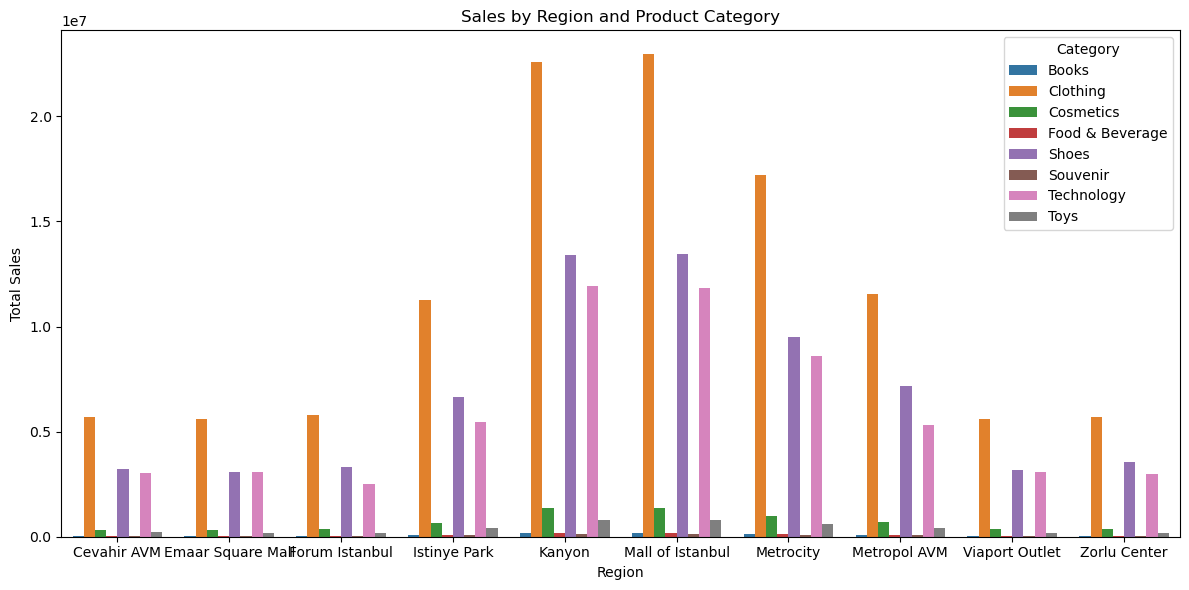

In [18]:
# 8. Create Grouped or Stacked Bar Plot
# Ensure 'region_category_sales' exists (in case cells were run out of order)
if 'region_category_sales' not in globals():
	if 'df' not in globals():
		raise NameError("df is not defined. Please run the cell that loads the dataframe first.")
	# ensure 'region' column exists
	if 'region' not in df.columns:
		df['region'] = df['shopping_mall']
	region_category_sales = df.groupby(['region', 'category'])['sales_amount'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='region', y='sales_amount', hue='category', data=region_category_sales)
plt.title("Sales by Region and Product Category")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.legend(title="Category", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


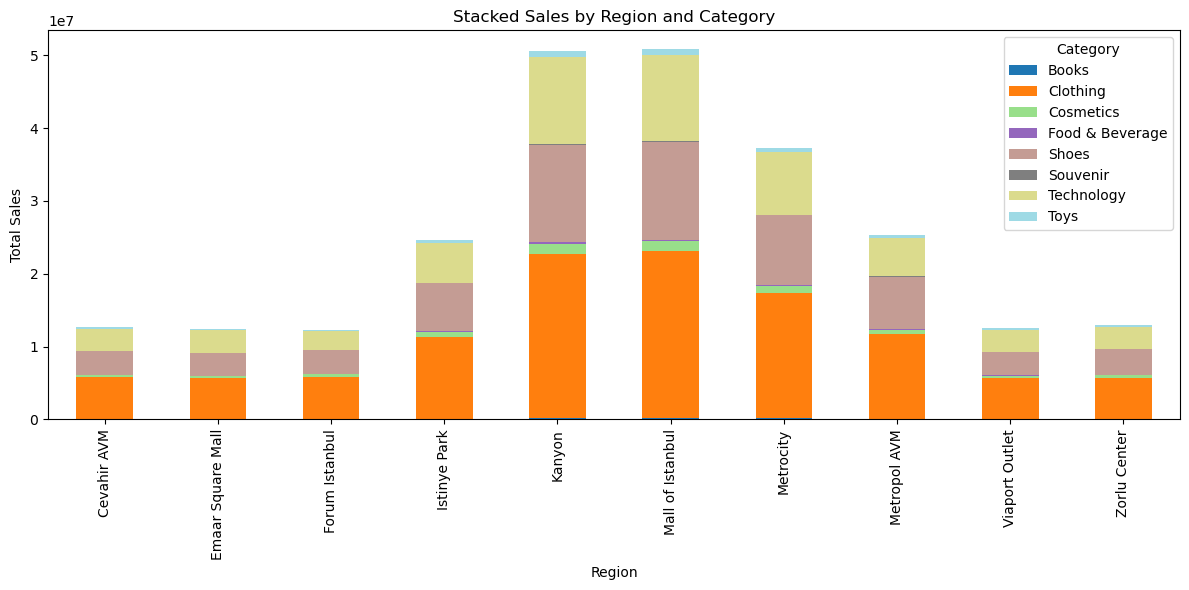

In [19]:
# Ensure 'region_category_sales' exists (in case cells were run out of order)
if 'region_category_sales' not in globals():
	if 'df' not in globals():
		raise NameError("df is not defined. Please run the cell that loads the dataframe first.")
	# ensure 'region' column exists
	if 'region' not in df.columns:
		df['region'] = df['shopping_mall']
	region_category_sales = df.groupby(['region', 'category'])['sales_amount'].sum().reset_index()

pivot_df = region_category_sales.pivot(index='region', columns='category', values='sales_amount').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Stacked Sales by Region and Category")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.legend(title="Category", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
